<a href="https://colab.research.google.com/github/rafa-fortes/CursoDS_Mentorama/blob/main/Regress%C3%A3o_Log%C3%ADstica_com_m%C3%A9trica_de_performance_AUC_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aprendizagem Supervisionada: Classificação

### Dígito é par ou ímpar: Machine Learning

### Checklist



1.   Definição do problema e Objetivo
2.   Obtenção dos dados
3.   Análise exploratória dos dados
4.   Preparação dos Dados
5. Construção do modelo e Avaliação





1.   Definição do problema e Objetivo

     Construir um algoritmo que faça a predição se um dígito é par ou ímpar.



2.   Obtenção dos dados
     
     sklearn.datasets




# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Importando os dados

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


##3. Análise exploratória dos dados

Separando os dados

In [ ]:
X, y = mnist["data"], mnist["target"].astype(float)

Verificando as dimensões das variáveis

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

Tipo das variáveis

In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('float64'))

In [ ]:
y[:10]

array([5., 0., 4., 1., 9., 2., 1., 3., 1., 4.])

In [ ]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Vejamos alguns exemplos de dígitos:

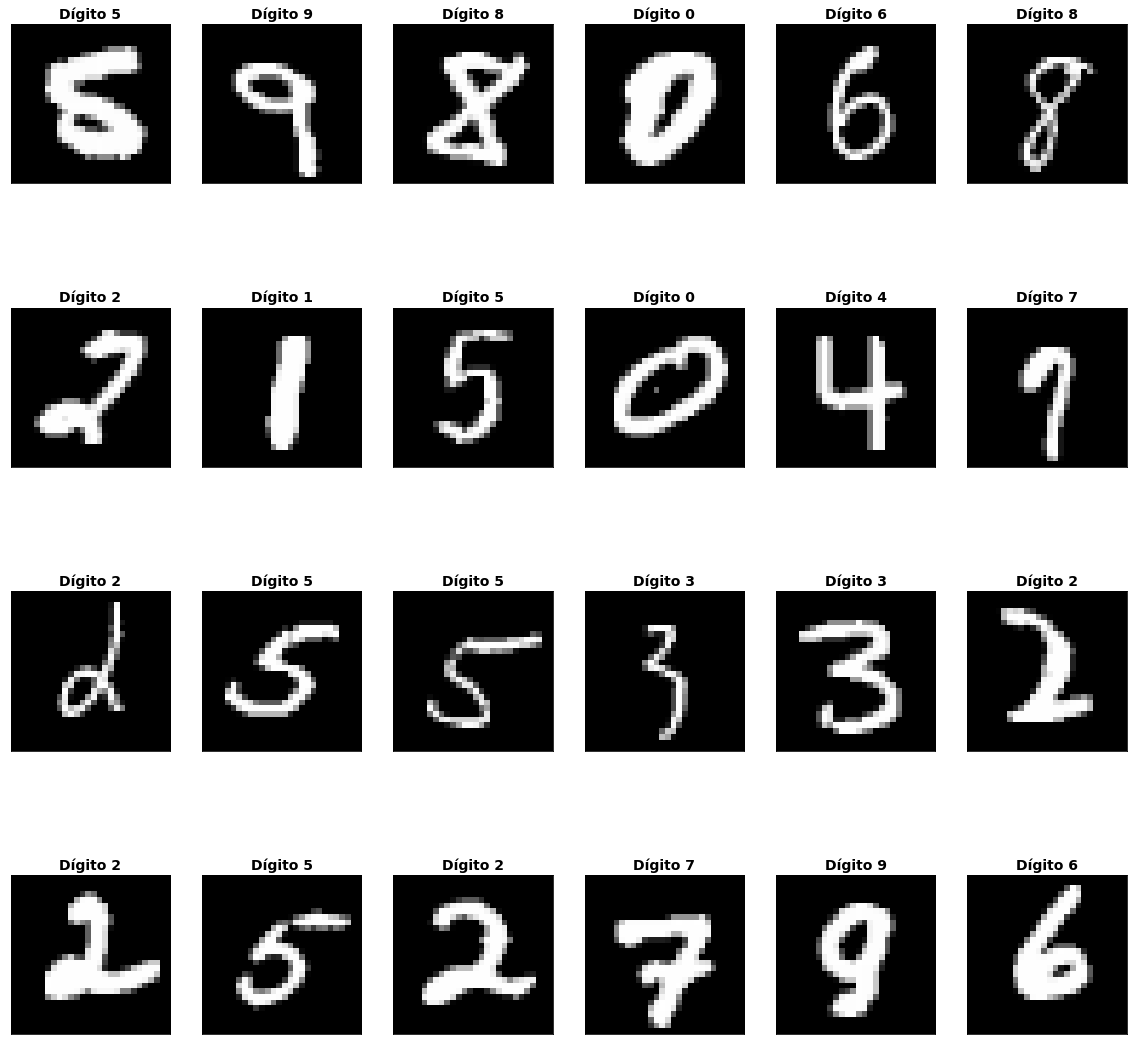

In [ ]:
random_idx = np.random.randint(0, X.shape[0], size = 24)
plt.figure(figsize = [20, 20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = X[idx_i, :].reshape(28, 28)
    yval = y[idx_i]
    plt.subplot(4, 6, i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title('Dígito '+str(int(yval)), fontsize = 14, fontweight = 'bold');

### 4. Preparação dos Dados

Vamos fazer a divisão dos dados em treino e teste.

O dataset já vem aleatorizado, por isso podemos fazer a divisão conforme:

In [ ]:
#55000 instâncias para treino/ 15000 para teste

#Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

In [ ]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((56000, 784), (14000, 784), (56000,), (14000,))

Transformando a variável target para assumir 2 valores apenas:

- irá valer 1 se o dígito for ímpar;

- irá valer 0 se o dígito for par;

In [ ]:
ytrain = np.where(ytrain % 2 == 0, 1, 0)
ytest = np.where(ytest % 2 == 0, 1, 0)

In [ ]:
Xtrain.shape, ytrain.shape

((56000, 784), (56000,))

Abaixo, vamos ver o que essa transformação nós indicou.

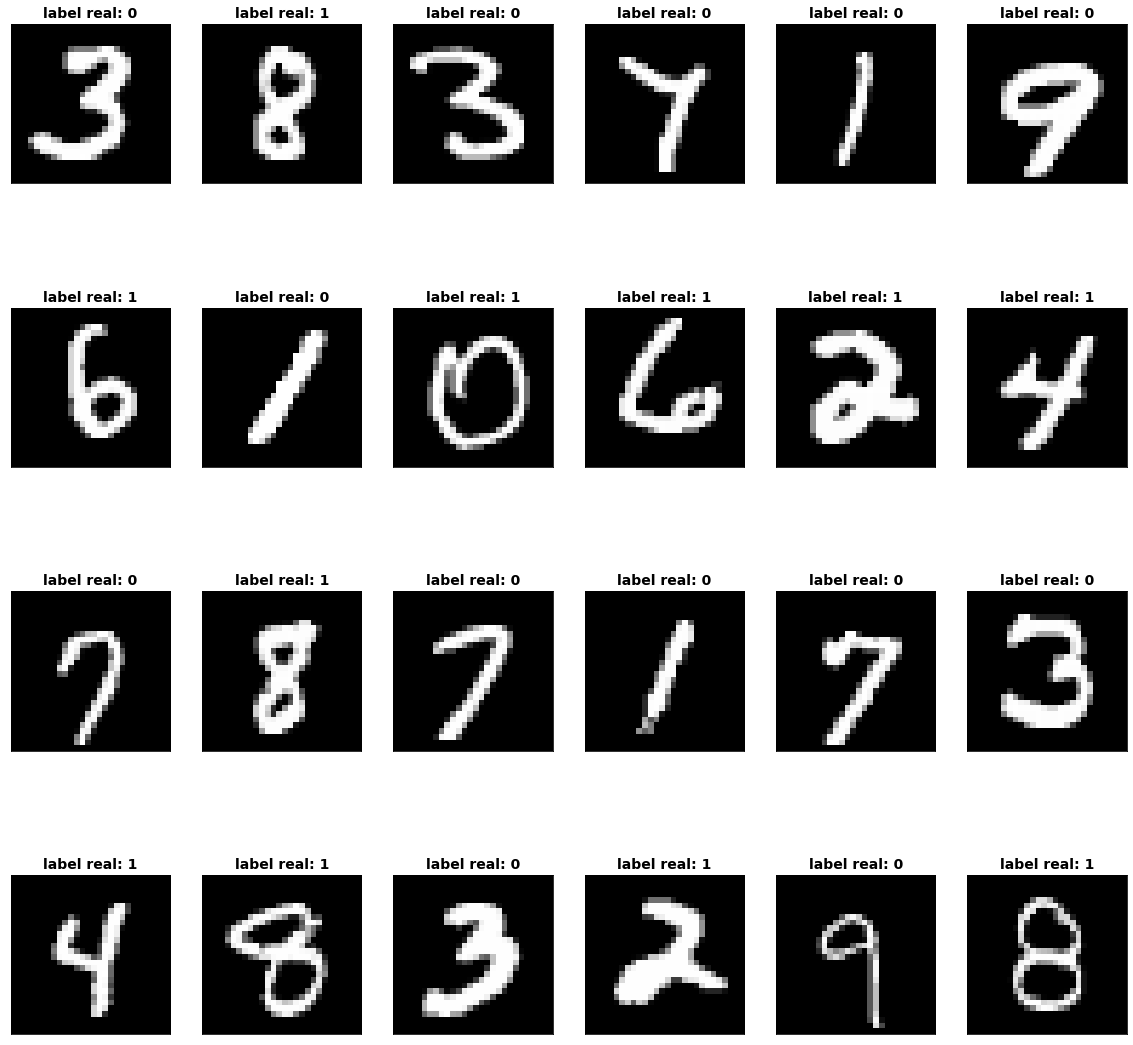

In [ ]:
random_idx = np.random.randint(0,Xtrain.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtrain[idx_i, :].reshape(28,28)
    yval = ytrain[idx_i]
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("label real: "+str(yval), fontsize = 14, fontweight = 'bold')
plt.show()

Acima, temos exemplos do dataset de treino.

Vejamos o balanceamento da nosso variável target:

In [ ]:
print('Percentual de Classe positiva:', (ytrain.sum() / ytrain.size) * 100, '%')
print('Percentual de Classe negativa:', ((ytrain.size - ytrain.sum()) / ytrain.size) * 100, '%')

Percentual de Classe positiva: 49.262499999999996 %
Percentual de Classe negativa: 50.737500000000004 %


Acima, vemos que nossa variável target não está sofrendo de desbalanceamento.


Apartir de agora, temos nosso problema bem elaborado.

Já temos o dataset de treinamento e o dataset de teste, entendemos bem nosso
variável target e as nomenclaturas nesse contexto. 

5. Construção do modelo e Avaliação

Vamos importar os algoritmos que iremos usar.

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
t0 = time.time()

logreg = LogisticRegression() #instanciando o algoritmo
logreg.fit(Xtrain, ytrain) #treinando nosso algoritmo nos dados. 

t1 = time.time()
print('Tempo (em segundos) para execução:', np.round(t1-t0,2))

Tempo (em segundos) para execução: 7.39


In [ ]:
logreg_preds = logreg.predict(Xtrain)
accuracy_score(y_true = ytrain, y_pred = logreg_preds)

0.9010714285714285

Acurácia - em dados de treino - da regressão logística foi de :    0.9016964285714286

Tendo treinado o algoritmo, podemos fazer as prediões.

Primerio, vamos acessar s valores de  $\theta$:

In [ ]:
print(logreg.intercept_)

[-0.00098934]


In [ ]:
print(logreg.coef_)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.28438589e-05  3.03106705e-05  2.43376640e-06  1.01406933e-07
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.34177964e-07  9.51076506e-07  1.40718385e-05  2.18720153e-05
   7.16914566e-05  7.22619564e-05  8.12373111e-05  1.52368771e-04
   3.06312050e-04  3.82214269e-04  1.54392389e-04 -5.63662501e-05
   2.61752306e-04  2.19345604e-04  1.18499287e-04  7.12282495e-05
   5.40840901e-05  3.21606146e-05  6.77310886e-06  3.27733893e-06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.43004520e-06
   8.11617

In [ ]:
logreg.coef_.size

784

Temos 784 coeficientes, mais um intercepto($\theta_0$), justamente a dimensão de colunas do nosso dataset de treinamento! 

Para as predições:

In [ ]:
logreg.predict(Xtrain)

array([1, 0, 1, ..., 1, 1, 0])

Para acessar as probabilidades:

In [ ]:
logreg.predict_proba(Xtrain)

array([[9.05433659e-03, 9.90945663e-01],
       [9.99461468e-01, 5.38532486e-04],
       [4.07963076e-03, 9.95920369e-01],
       ...,
       [4.07262909e-01, 5.92737091e-01],
       [8.49025606e-03, 9.91509744e-01],
       [8.81547069e-01, 1.18452931e-01]])

In [ ]:
logreg.predict_proba(Xtrain).shape

(56000, 2)

Vemos que o array resultante tem 56000 linhas - correspondendo as linhas do dataset de treinamento - e 2 colunas. __A primeira coluna representa a probabilidade de ser da classe 0 (par); enquanto a segunda coluna representa a probabilidade de ser da classe 1 (ímpar).__

<br>

Por exemplo, para a primeira instância do dataset de treino temos: 

In [ ]:
logreg.predict_proba(Xtrain) [0, ]

array([0.00905434, 0.99094566])

De acordo com o algoritmo, essa instância tem 99% de probabilidade de ser da classe 1 (ímpar)

In [ ]:
ytrain[0]

1

Veja que a classe real dessa instância é 1, de modo que o algoritmo parace ter feito um bom trabalho!

Vamos comparar as predições desse classificador no dataset de treino (abaixo, consideramos apenas as 20 primeiras instâncias):

In [ ]:
logreg.predict(Xtrain) [:20]

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
ytrain[:20]

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

O classificador conseguiu acertar quase tudo!

Vamos avaliar nossa métrica de performance AUC nos dados treino:

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score, recall_score, precision_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])
#fpr = false positive rate = taxa de falso positivos
#tpr = true positive rate = taxa de verdadeiro positivos
#thresholds = limiares usados

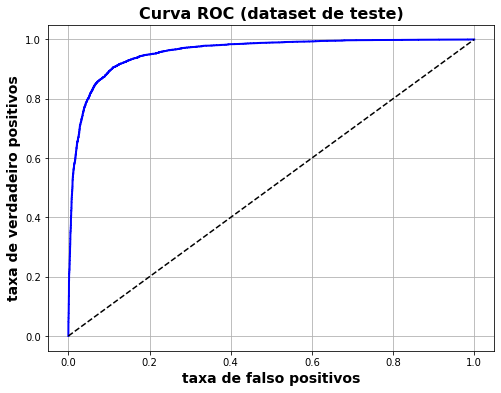

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid();

In [ ]:
roc_auc_score(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

0.957871280850048

Acima, temos um bom score!

__Abaixo, iremos analisar os resultados para versões do KNN - Classifier:__


*   KNN(K = 1)
*   KNN(K = 2)
*   KNN(K = 5)


In [ ]:
num_vizinhos = [1,2,5]

for n in num_vizinhos:
    knn = KNeighborsClassifier(n_neighbors = n, metric = 'minkowski', p = 2, n_jobs = -1)
    knn.fit(Xtrain, ytrain)

    preds = knn.predict(Xtrain)

    roc_auc_score_train = roc_auc_score(y_true = ytrain, y_score = preds)
    
    print(' k = ' + str(n) + ' | AUC: ' + str(np.round(roc_auc_score_train,2)))


 k = 1 | AUC: 1.0
 k = 2 | AUC: 0.99
 k = 5 | AUC: 0.99


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2, n_jobs = -1)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn_preds = knn.predict(Xtest)
knn_preds

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
ytest

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
roc_auc_score(y_true = ytest, y_score = knn_preds)

0.9850030545355222

Vemos que o modelo KNN(K=1) obteve um AUC de 9850030545355222 um valor bem interessante  

__Validação cruzada.__

Aplicaremos a validação cruzada para a regressão logística em nosso problema, consideramos 5 folds e accuracy_score como métrica de performance a ser medida.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 5)

t0 = time.time()

classif__ = LogisticRegression()
lista_acuracia_treino = []
lista_acuracia_validacao = []

for train_index, val_index in kf.split(Xtrain, ytrain):

    Xtrain_folds = Xtrain[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_fold = Xtrain[val_index]
    yval_fold = ytrain[val_index]

    classif__.fit(Xtrain_folds, ytrain_folds)

    pred_treino = classif__.predict(Xtrain_folds)
    pred_validacao = classif__.predict(Xval_fold)

    lista_acuracia_treino.append(accuracy_score(y_pred = pred_treino, y_true = ytrain_folds))
    lista_acuracia_validacao.append(accuracy_score(y_pred = pred_validacao, y_true = yval_fold ))

print('acurácias em treino: \n, ', lista_acuracia_treino, ' \n | média: ', np.mean(lista_acuracia_treino))
print()
print('acurácias em validação: \n, ', lista_acuracia_validacao, ' \n | média:', np.mean(lista_acuracia_validacao))

acurácias em treino: 
,  [0.9006473214285714, 0.9007142857142857, 0.9017857142857143, 0.9021205357142857, 0.90125]  
 | média:  0.9013035714285713

acurácias em validação: 
,  [0.9010714285714285, 0.899375, 0.8928571428571429, 0.8907142857142857, 0.89875]  
 | média: 0.8965535714285714


Finalmente, podemos ter um consolidado dessas métricas:

In [ ]:
prec_final = precision_score(y_true = ytest, y_pred = logreg.predict(Xtest), average = None).mean()
recall_final = recall_score(y_true = ytest, y_pred = logreg.predict(Xtest), average = None).mean()
f1_final = f1_score(y_true = ytest, y_pred = logreg.predict(Xtest), average = None).mean()
auc_final = roc_auc_score(y_true = ytest, y_score = logreg.predict(Xtest), average = None).mean()

print("Precision Final (média): ", np.round(prec_final,4))
print("Recall Final (média): ", np.round(recall_final,4))
print("F1 Final (média): ", np.round(f1_final,4))
print("AUC Final (média): ", np.round(auc_final,4))

Precision Final (média):  0.8966
Recall Final (média):  0.8968
F1 Final (média):  0.8967
AUC Final (média):  0.8968


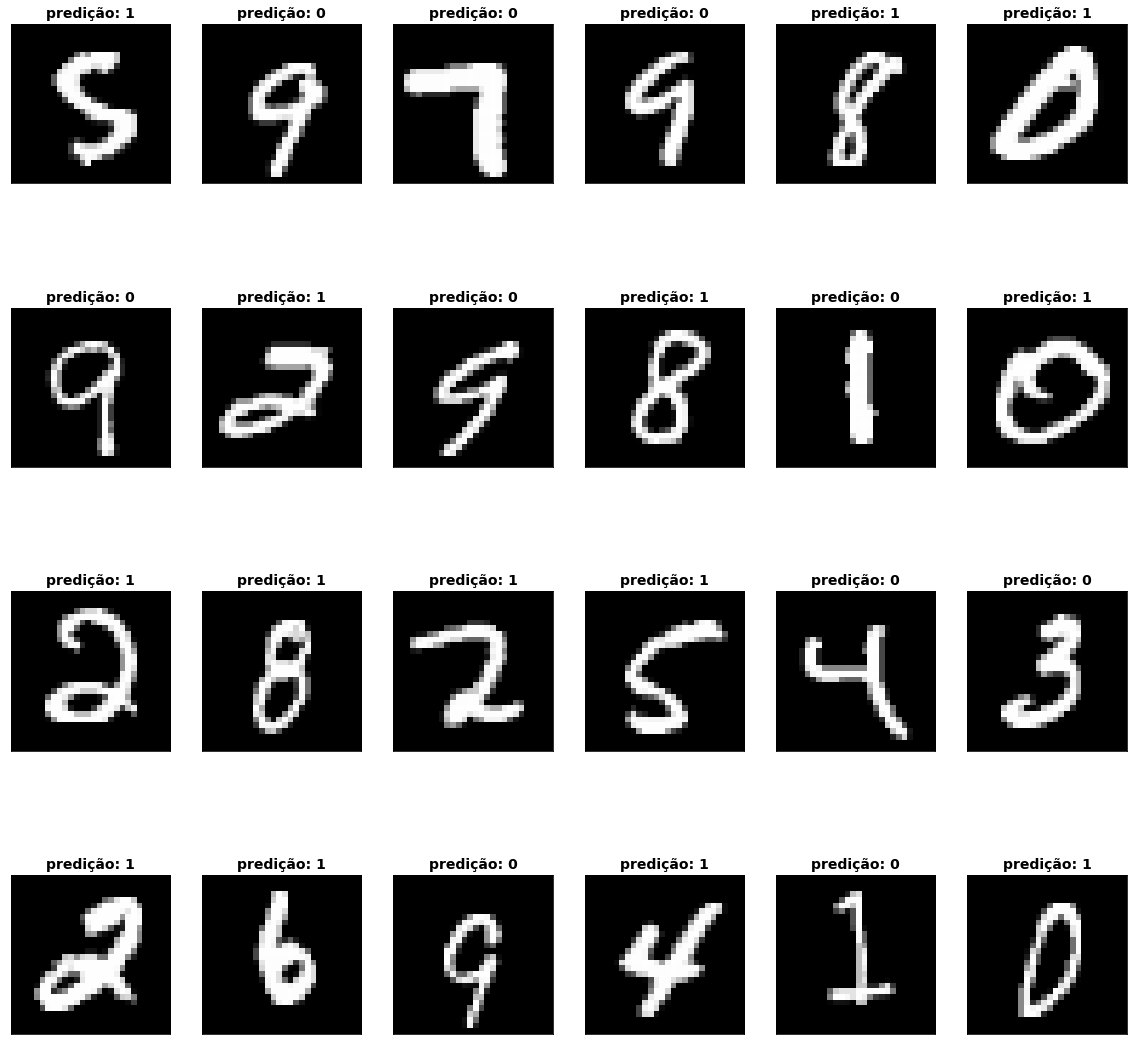

In [ ]:
random_idx = np.random.randint(0,Xtest.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtest[idx_i, :].reshape(28,28)
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("predição: "+str( int(logreg.predict(Xtest[idx_i, :].reshape(1, -1))[0]) ), fontsize = 14, fontweight = 'bold')
plt.show()

 __O algoritmo não se saiu muito bem!__